# Prerequisite<br>
<li> Polynomial Regression
<li> <a href="https://www.youtube.com/watch?v=SHEPb1JHw5o"> Cost Function </a>


# Terminology <br>
<li> m = number of points </li>
<li> n = number of factors </li>
<li> x = array of score </li>
<li> X = array of x </li>
<li> Y = red if 0 else blue</li>

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

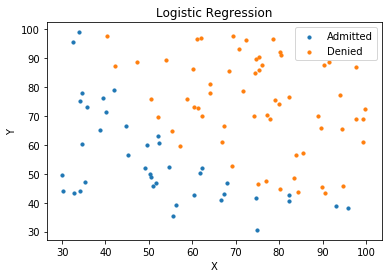

In [41]:
'''
Suppose data can be represented as following model
y = W[0] + score1 * W[1] + score2 * W[2]
'''
m = 100
n = 3

data = np.array(pd.read_csv("data/3.csv", header=None))
X = data[:, :2]
Y = data[:, 2]

plt.title('Logistic Regression')
plt.xlabel("X")
plt.ylabel("Y")

admitted = data[np.where(data[:, 2] == 0)]
denied = data[np.where(data[:, 2] == 1)]

# plots
plt.scatter(admitted[:, 0], admitted[:, 1], s=10, label='Admitted')
plt.scatter(denied[:, 0], denied[:, 1], s=10, label='Denied')
plt.legend()
plt.show()

X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


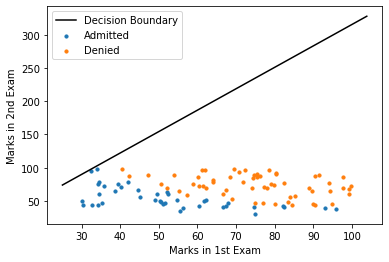

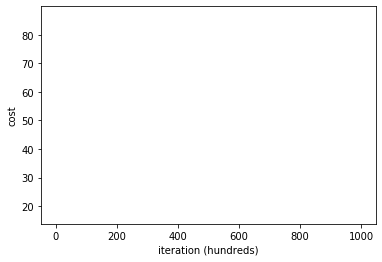

In [72]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# probability
def y_hat(W, x):
    z = np.dot(W.T, x)
    return sigmoid(z)

def compute_cost(W):
    return -(1 / m) * np.sum(y * np.log(y_hat(W, x)) + (1 - y) * np.log(1 - y_hat(W, X)))

  
def partial_deriv(W):
    d_W = np.zeros(n)
    
    for i in range(m):
        d_W += (y_hat(W, X[i]) - Y[i]) * X[i]
    
    return d_W

def model(learn_rate, n_iters, W):
    Cost = []
    
    for i in range(n_iters):
        W -= learn_rate * partial_deriv(W)
        Cost.append(compute_cost(W))
    
    return W, Cost

def graph(W):
    plt.scatter(admitted[:, 0], admitted[:, 1], s=10, label='Admitted')
    plt.scatter(denied[:, 0], denied[:, 1], s=10, label='Denied')
    x_values = np.array([np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)])
    y_values = - (W[0] + x_values * W[1]) / W[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color = "black")
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()


W, Cost = model(0.001, 10, np.zeros(n))
graph(W)

plt.xlabel("iteration (hundreds)")
plt.ylabel("cost")
plt.plot(Cost)